In [1]:
import os
from PIL import Image
import numpy as np
path="/content/drive/My Drive/manual_process/test_process_normal"
imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
inp=[]
y=[]
for imagePath in imagePaths:
  im = Image.open(imagePath)
  #print(np.array(im).reshape(128,128,1).shape)
  inp.append(np.array(im).reshape(128,128,1))
  y.append([0])


In [2]:
import os
from PIL import Image
import numpy as np
path="/content/drive/My Drive/manual_process/test_process_notnormal"
imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
for imagePath in imagePaths:
  im = Image.open(imagePath)
  #print(np.array(im).reshape(128,128,1).shape)
  inp.append(np.array(im).reshape(128,128,1))
  y.append([1])


In [3]:
'''import pickle
with open('/content/drive/My Drive/manual_process/inp.pkl','wb') as f:
     pickle.dump(inp, f)
with open('/content/drive/My Drive/manual_process/out.pkl','wb') as f:
     pickle.dump(y, f)'''

"import pickle\nwith open('/content/drive/My Drive/manual_process/inp.pkl','wb') as f:\n     pickle.dump(inp, f)\nwith open('/content/drive/My Drive/manual_process/out.pkl','wb') as f:\n     pickle.dump(y, f)"

In [4]:
import pickle
import pandas as pd
inp=pd.read_pickle('/content/drive/My Drive/manual_process/inp.pkl')
y=pd.read_pickle('/content/drive/My Drive/manual_process/out.pkl')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[<Axes: title={'center': '0'}>]], dtype=object)

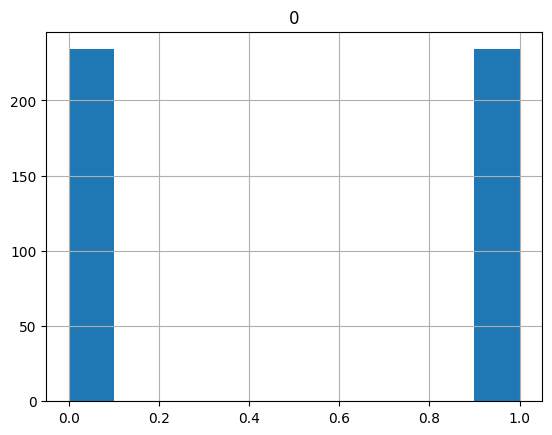

In [6]:
import pandas as pd
y=pd.DataFrame(y)
y.hist()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp,y, test_size=0.33, random_state=42)

In [8]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)

In [9]:
X_train.shape

(313, 128, 128, 1)

array([[<Axes: title={'center': '0'}>]], dtype=object)

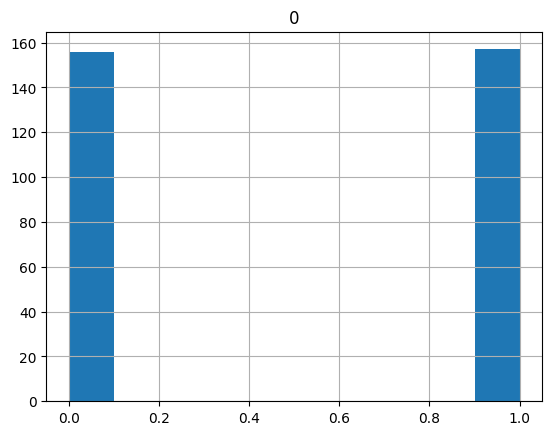

In [10]:
y_train.hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

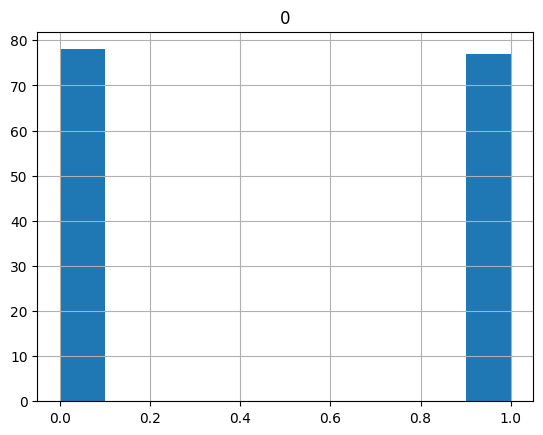

In [11]:
y_test.hist()

In [12]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=5)

Epoch 1/5
32/32 [==============================] - 23s 676ms/step - loss: 0.5142 - accuracy: 0.7636
Epoch 2/5
32/32 [==============================] - 23s 733ms/step - loss: 0.2472 - accuracy: 0.8946
Epoch 3/5
32/32 [==============================] - 21s 662ms/step - loss: 0.1724 - accuracy: 0.9201
Epoch 4/5
32/32 [==============================] - 24s 763ms/step - loss: 0.1233 - accuracy: 0.9489
Epoch 5/5
32/32 [==============================] - 21s 646ms/step - loss: 0.0780 - accuracy: 0.9712


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 128, 128, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [16]:
#y_pred=model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

5/5 [==============================] - 4s 868ms/step


0.9225806451612903

In [18]:
#model.save('/content/drive/My Drive/manual_process/model1.h5')

In [19]:
from tensorflow import keras
model1=keras.Sequential()
model1.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,batch_size=10,epochs=5,validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 9s 309ms/step - loss: 0.6111 - accuracy: 0.7480 - val_loss: 0.7599 - val_accuracy: 0.6508
Epoch 2/5
25/25 [==============================] - 9s 341ms/step - loss: 0.3587 - accuracy: 0.8800 - val_loss: 0.6389 - val_accuracy: 0.7460
Epoch 3/5
25/25 [==============================] - 8s 337ms/step - loss: 0.3204 - accuracy: 0.8760 - val_loss: 0.1910 - val_accuracy: 0.9365
Epoch 4/5
25/25 [==============================] - 8s 308ms/step - loss: 0.1898 - accuracy: 0.9200 - val_loss: 0.1757 - val_accuracy: 0.9365
Epoch 5/5
25/25 [==============================] - 9s 375ms/step - loss: 0.1384 - accuracy: 0.9640 - val_loss: 0.2171 - val_accuracy: 0.8889


In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 128, 128, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

In [23]:
#y_pred=model1.predict_classes(X_test)
y_pred = (model1.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

5/5 [==============================] - 1s 239ms/step


0.864516129032258

In [24]:
#model1.save('/content/drive/My Drive/manual_process/model2.h5')

In [25]:
from tensorflow import keras
model1=keras.Sequential()
model1.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,batch_size=10,epochs=3,validation_split=0.2)

Epoch 1/3
25/25 [==============================] - 61s 2s/step - loss: 0.7400 - accuracy: 0.6440 - val_loss: 0.4102 - val_accuracy: 0.8571
Epoch 2/3
25/25 [==============================] - 55s 2s/step - loss: 0.3808 - accuracy: 0.8240 - val_loss: 0.3834 - val_accuracy: 0.8254
Epoch 3/3
25/25 [==============================] - 56s 2s/step - loss: 0.2287 - accuracy: 0.9240 - val_loss: 1.6100 - val_accuracy: 0.5397


In [26]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 128, 128, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 128)       0         
                                                                 
 flatten_2 (Flatten)         (None, 492032)           

In [28]:
#y_pred=model1.predict_classes(X_test)
y_pred = (model1.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

5/5 [==============================] - 10s 2s/step


0.5161290322580645

In [ ]:
#model1.save('/content/drive/My Drive/manual_process/model3.h5')

In [29]:
from keras.models import load_model
m1 = load_model('/content/drive/My Drive/manual_process/model1.h5')
m2 = load_model('/content/drive/My Drive/manual_process/model2.h5')
m3 = load_model('/content/drive/My Drive/manual_process/model3.h5')

In [30]:
m1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Bat  (None, 128, 128, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_15 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 62, 62, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 246016)           

In [31]:
'''m1.save_weights('Pneumonia_wigth.h5')'''

"m1.save_weights('Pneumonia_wigth.h5')"

In [33]:
#y1=m1.predict_proba(X_test)
y1 = (m1.predict(X_test) > 0.5).astype("int32")
#y2=m3.predict_proba(X_test)
y2 = (m3.predict(X_test) > 0.5).astype("int32")
#y3=m2.predict_proba(X_test)
y3 = (m2.predict(X_test) > 0.5).astype("int32")
y1=(y1+y2+y3)/3
y3=y1.round()
accuracy_score(y3, y_test)

5/5 [==============================] - 2s 308ms/step


0.8903225806451613

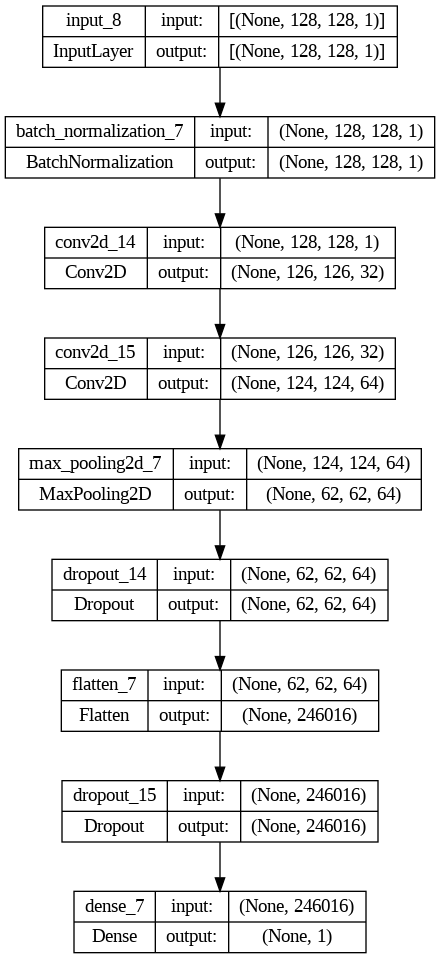

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(m1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)